In [ ]:
# 🎯 Objective
# Reduce dimensionality and improve stability.

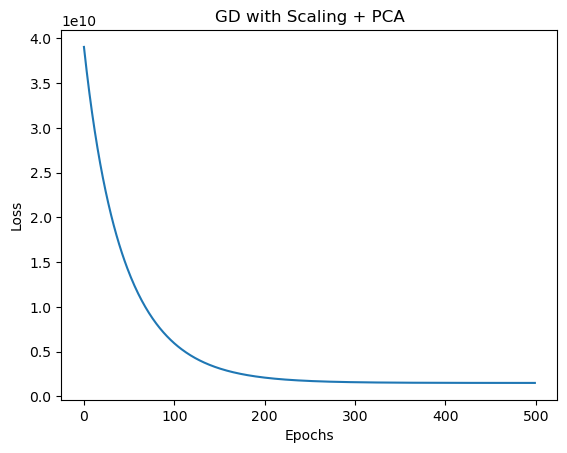

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("train.csv")

FEATURES = [
    "GrLivArea",
    "OverallQual",
    "TotalBsmtSF",
    "GarageCars",
    "YearBuilt",
    "SalePrice"
]

df = df[FEATURES]
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)

X = df.drop("SalePrice", axis=1).values
y = df["SalePrice"].values.reshape(-1,1)

# Scale
X = (X - X.mean(axis=0)) / X.std(axis=0)

# PCA
cov = np.cov(X, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov)

idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, idx]

k = 3
X_pca = np.dot(X, eig_vecs[:, :k])
X_pca = np.c_[np.ones(X_pca.shape[0]), X_pca]

def gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    theta = np.zeros((n,1))
    losses = []

    for _ in range(epochs):
        error = np.dot(X, theta) - y
        losses.append(np.mean(error**2))
        theta -= (lr/m) * np.dot(X.T, error)

    return theta, losses

theta_pca, loss_pca = gradient_descent(X_pca, y, lr=0.01, epochs=500)
y_pred_pca = np.dot(X_pca, theta_pca)

plt.plot(loss_pca)
plt.title("GD with Scaling + PCA")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
